In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import numpy as np
from sklearn import metrics

In [2]:
df1 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Approximate_coefficients\cA-ble-combined-files.csv")
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.dropna(inplace=True)
df1.isnull().sum()
df1.drop(df1[df1['Labels'] == 'Labels'].index, inplace = True)
df1.drop("Labels",axis=1,inplace=True)
df2 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Approximate_coefficients\cA-dji-fly-combined-files.csv")
df2.drop('Unnamed: 0',axis=1,inplace=True)
df2.dropna(inplace=True)
df2.isnull().sum()
df2.drop(df2[df2['Labels'] == 'Labels'].index, inplace = True)
df2.drop("Labels",axis=1,inplace=True)
df3 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Approximate_coefficients\cA-dji-vid-combined-files.csv")
df3.drop('Unnamed: 0',axis=1,inplace=True)
df3.dropna(inplace=True)
df3.isnull().sum()
df3.drop(df3[df3['Labels'] == 'Labels'].index, inplace = True)
df3.drop("Labels",axis=1,inplace=True)
dfa = pd.concat([df1, df2,df3], axis=0, ignore_index=True)

C:\Users\student\AppData\Local\Temp\ipykernel_14920\364653728.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Approximate_coefficients\cA-ble-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14920\364653728.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Approximate_coefficients\cA-dji-fly-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14920\364653728.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Approximate_coefficients\cA-dji-vid-combined-files.csv")


In [3]:
df4 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Descriptive_coefficients\cD-ble-combined-files.csv")
df4.drop('Unnamed: 0',axis=1,inplace=True)
df4.dropna(inplace=True)
df4.isnull().sum()
df4.drop(df4[df4['Labels'] == 'Labels'].index, inplace = True)

df5 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Descriptive_coefficients\cD-dji-fly-combined-files.csv")
df5.drop('Unnamed: 0',axis=1,inplace=True)
df5.dropna(inplace=True)
df5.isnull().sum()
df5.drop(df5[df5['Labels'] == 'Labels'].index, inplace = True)

df6 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Descriptive_coefficients\cD-dji-vid-combined-files.csv")
df6.drop('Unnamed: 0',axis=1,inplace=True)
df6.dropna(inplace=True)
df6.isnull().sum()
df6.drop(df6[df6['Labels'] == 'Labels'].index, inplace = True)
dfb = pd.concat([df4, df5,df6], axis=0, ignore_index=True)

C:\Users\student\AppData\Local\Temp\ipykernel_14920\507689285.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Descriptive_coefficients\cD-ble-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14920\507689285.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Descriptive_coefficients\cD-dji-fly-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14920\507689285.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Descriptive_coefficients\cD-dji-vid-combined-files.csv")


In [4]:
df = pd.concat([dfa, dfb], axis=1, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.42204765250281806,0.002196437711138652,-0.010192647376830328,0.0035010063352879884,-0.010274861157190982,0.0030154483830886576,-0.021815466080122886,0.011064454428858792,0.03288525887956754,0.004304891550304923,...,-1.8316056845427267e-06,0.0015451040292182472,-1.8613878907954885e-05,0.001340199281372737,-0.006012282887269361,0.0019073609655378852,-0.02196003599027788,0.0019073600861080834,3.6380224980782356e-06,BLE-IPhone6S
1,-0.03768653533307109,0.005900599613821633,-0.010031562868760889,0.0038150919900910188,-0.010079415428657458,0.0031922802327142286,-0.02470061731085586,0.011123746873907693,0.023238327537483314,0.004806817130375256,...,9.158028422713633e-07,0.0016795520170059916,4.653469726988678e-05,0.0014053478575505787,-0.006384560465428455,0.0021135396160106112,-0.019858488238713414,0.002113539417600591,4.467048869751445e-06,BLE-IPhone6S
2,-0.41053378469502677,0.003815845176130709,-0.01016063895066021,0.0037122017462590533,-0.010163177883743255,0.0033132704456159327,-0.024086359306893353,0.011135143772678081,-0.062421261440778836,0.004555528833465773,...,7.371096047549982e-07,0.0016352328001899214,0.0,0.0014332686759125101,-0.006812679680311413,0.0020122099693063744,-0.00656864322334498,0.0020122098342979498,4.048988417245382e-06,BLE-IPhone6S
3,-0.540285457367073,0.0029782206252727487,-0.010156305639650438,0.003953902540971516,-0.0101445640048353,0.0035552508714193423,-0.02442140912723654,0.011244800528609548,-0.0049853428150490806,0.004826488856531453,...,-8.190106719499283e-08,0.0017778710078695493,-1.861387890795467e-05,0.0015728727677221705,-0.006272877191980728,0.00216064996271806,0.02661407824791601,0.002160649961165803,4.6684082546857855e-06,BLE-IPhone6S
4,-0.13947545639468562,0.0029782206252727487,-0.01012554062059137,0.00341543675549119,-0.010163177883743255,0.0028758442912789972,-0.023137051482587663,0.011000367075389893,0.03506742821964078,0.004299011855540309,...,-1.9879622673695697e-06,0.0015277282204499833,9.306939453977009e-06,0.001275050705194894,-0.005733074703650041,0.0019243521353933463,0.02514221223982336,0.0019243511085555464,3.7031271889989607e-06,BLE-IPhone6S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,-1.580033529698243,0.2859091800261839,-0.00482820193107342,0.2010356901581723,0.005118816699687528,0.22011842502601806,-0.3046719699654022,0.21935988250867566,-0.028188399861477132,0.21930674070883646,...,2.7131589896234936e-05,0.0717440447929487,0.0,0.07549789285066419,-0.1531177678968352,0.09072060145710933,0.03059691203403007,0.09072059740002011,0.008230226792616537,DJI-INSPIRE-VIDEOING
699996,-1.5732519228583344,0.2859091800261839,-0.008140452336125198,0.19875643022215567,-0.007482779320997782,0.21958792947714134,-0.3046719699654022,0.21770953056754086,-0.007857379224396702,0.21755728610116065,...,-4.09133058396844e-05,0.0717004871488416,0.0,0.0758608634893693,-0.14807340671277947,0.08938424143248361,0.022667593885058106,0.08938423206898387,0.007989540942561964,DJI-INSPIRE-VIDEOING
699997,-1.532651227797683,0.2859091800261839,-0.005443137480228173,0.19548249652555277,0.0027269332600153642,0.2108114855720407,-0.3046719699654022,0.21505195212358802,-0.02324485939261929,0.21498305599869327,...,3.3467754276502324e-05,0.06976368415972886,0.0,0.06621887421504877,-0.1522429155881613,0.08898218869997132,0.03308924083751441,0.08898218240606759,0.007917828785746685,DJI-INSPIRE-VIDEOING
699998,-1.5682506771110056,0.2859091800261839,-0.006284693282311494,0.1988710955164382,0.0008562384297659195,0.2166097088518686,-0.3046719699654022,0.21739288362928408,-0.018548067159849295,0.21730202135047613,...,-9.705276462607581e-05,0.0712366793503441,0.0,0.07374818823331644,-0.15174034085764657,0.0897428662602625,0.02835897299347792,0.08974281378120576,0.008053772625368173,DJI-INSPIRE-VIDEOING


In [5]:
#df.iloc[:700000,-1]=df.iloc[:700000,-1].replace(regex='DJI-INSPIRE-VIDEOING', value='BLE')

In [6]:
df=df.rename(columns={22:'Labels'})

In [7]:
#df = df.iloc[:,1:]

In [8]:
#df.loc[250:,'Labels']=1

In [9]:
#df=df.rename(columns={22:'Labels'})

In [10]:
df['Labels'].unique()

array(['BLE-IPhone6S', 'DJI-INSPIRE-FLYING', 'DJI-INSPIRE-VIDEOING'],
      dtype=object)

In [11]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Labels']= label_encoder.fit_transform(df['Labels'])
df['Labels'].unique()

array([0, 1, 2])

In [12]:
df.shape

(700000, 23)

In [13]:
#df.drop(columns=['Unnamed: 0'],inplace=True, axis=1)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Labels
0,-0.42204765250281806,0.002196437711138652,-0.010192647376830328,0.0035010063352879884,-0.010274861157190982,0.0030154483830886576,-0.021815466080122886,0.011064454428858792,0.03288525887956754,0.004304891550304923,...,-1.8316056845427267e-06,0.0015451040292182472,-1.8613878907954885e-05,0.001340199281372737,-0.006012282887269361,0.0019073609655378852,-0.02196003599027788,0.0019073600861080834,3.6380224980782356e-06,0
1,-0.03768653533307109,0.005900599613821633,-0.010031562868760889,0.0038150919900910188,-0.010079415428657458,0.0031922802327142286,-0.02470061731085586,0.011123746873907693,0.023238327537483314,0.004806817130375256,...,9.158028422713633e-07,0.0016795520170059916,4.653469726988678e-05,0.0014053478575505787,-0.006384560465428455,0.0021135396160106112,-0.019858488238713414,0.002113539417600591,4.467048869751445e-06,0
2,-0.41053378469502677,0.003815845176130709,-0.01016063895066021,0.0037122017462590533,-0.010163177883743255,0.0033132704456159327,-0.024086359306893353,0.011135143772678081,-0.062421261440778836,0.004555528833465773,...,7.371096047549982e-07,0.0016352328001899214,0.0,0.0014332686759125101,-0.006812679680311413,0.0020122099693063744,-0.00656864322334498,0.0020122098342979498,4.048988417245382e-06,0
3,-0.540285457367073,0.0029782206252727487,-0.010156305639650438,0.003953902540971516,-0.0101445640048353,0.0035552508714193423,-0.02442140912723654,0.011244800528609548,-0.0049853428150490806,0.004826488856531453,...,-8.190106719499283e-08,0.0017778710078695493,-1.861387890795467e-05,0.0015728727677221705,-0.006272877191980728,0.00216064996271806,0.02661407824791601,0.002160649961165803,4.6684082546857855e-06,0
4,-0.13947545639468562,0.0029782206252727487,-0.01012554062059137,0.00341543675549119,-0.010163177883743255,0.0028758442912789972,-0.023137051482587663,0.011000367075389893,0.03506742821964078,0.004299011855540309,...,-1.9879622673695697e-06,0.0015277282204499833,9.306939453977009e-06,0.001275050705194894,-0.005733074703650041,0.0019243521353933463,0.02514221223982336,0.0019243511085555464,3.7031271889989607e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,-1.580033529698243,0.2859091800261839,-0.00482820193107342,0.2010356901581723,0.005118816699687528,0.22011842502601806,-0.3046719699654022,0.21935988250867566,-0.028188399861477132,0.21930674070883646,...,2.7131589896234936e-05,0.0717440447929487,0.0,0.07549789285066419,-0.1531177678968352,0.09072060145710933,0.03059691203403007,0.09072059740002011,0.008230226792616537,2
699996,-1.5732519228583344,0.2859091800261839,-0.008140452336125198,0.19875643022215567,-0.007482779320997782,0.21958792947714134,-0.3046719699654022,0.21770953056754086,-0.007857379224396702,0.21755728610116065,...,-4.09133058396844e-05,0.0717004871488416,0.0,0.0758608634893693,-0.14807340671277947,0.08938424143248361,0.022667593885058106,0.08938423206898387,0.007989540942561964,2
699997,-1.532651227797683,0.2859091800261839,-0.005443137480228173,0.19548249652555277,0.0027269332600153642,0.2108114855720407,-0.3046719699654022,0.21505195212358802,-0.02324485939261929,0.21498305599869327,...,3.3467754276502324e-05,0.06976368415972886,0.0,0.06621887421504877,-0.1522429155881613,0.08898218869997132,0.03308924083751441,0.08898218240606759,0.007917828785746685,2
699998,-1.5682506771110056,0.2859091800261839,-0.006284693282311494,0.1988710955164382,0.0008562384297659195,0.2166097088518686,-0.3046719699654022,0.21739288362928408,-0.018548067159849295,0.21730202135047613,...,-9.705276462607581e-05,0.0712366793503441,0.0,0.07374818823331644,-0.15174034085764657,0.0897428662602625,0.02835897299347792,0.08974281378120576,0.008053772625368173,2


In [15]:
#df.to_csv(r"C:\Users\student\Desktop\ktt\1a.csv")

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(df.drop(columns=['Labels'], axis=1))

In [17]:
y = df['Labels']
scaledX = scaledX.reshape(-1,22,1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledX,y,test_size=0.20,random_state=0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560000, 22, 1)
(140000, 22, 1)
(560000,)
(140000,)


In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D B 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
n_filters=(8,8,8)
droprate=0.1

In [22]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
y_train.shape

(560000,)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)


# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/100
56000/56000 - 694s - loss: 0.2052 - accuracy: 0.9289 - val_loss: 0.1893 - val_accuracy: 0.9323 - 694s/epoch - 12ms/step
Epoch 2/100
56000/56000 - 684s - loss: 0.2054 - accuracy: 0.9287 - val_loss: 0.1937 - val_accuracy: 0.9295 - 684s/epoch - 12ms/step
Epoch 3/100
56000/56000 - 678s - loss: 0.2051 - accuracy: 0.9290 - val_loss: 0.1886 - val_accuracy: 0.9317 - 678s/epoch - 12ms/step
Epoch 4/100
56000/56000 - 676s - loss: 0.2056 - accuracy: 0.9291 - val_loss: 0.1870 - val_accuracy: 0.9333 - 676s/epoch - 12ms/step
Epoch 5/100
56000/56000 - 675s - loss: 0.2045 - accuracy: 0.9291 - val_loss: 0.1935 - val_accuracy: 0.9301 - 675s/epoch - 12ms/step
Epoch 6/100
56000/56000 - 689s - loss: 0.2047 - accuracy: 0.9293 - val_loss: 0.1904 - val_accuracy: 0.9314 - 689s/epoch - 12ms/step
Epoch 7/100
56000/56000 - 682s - loss: 0.2051 - accuracy: 0.9290 - val_loss: 0.1885 - val_accuracy: 0.9322 - 682s/epoch - 12ms/step
Epoch 8/100
56000/56000 - 728s - loss: 0.2042 - accuracy: 0.9292 - val_loss:

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [33]:
from matplotlib import pyplot

In [34]:
#y1_pred_train =model.predict(y_train) 

y_pred_test  = np.argmax(model.predict(X_test),axis=1)
y_pred_train = np.argmax(model.predict(X_train),axis=1) 

17500/17500 [==============================] - 88s 5ms/step


In [ ]:
y_pred_test.shape

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

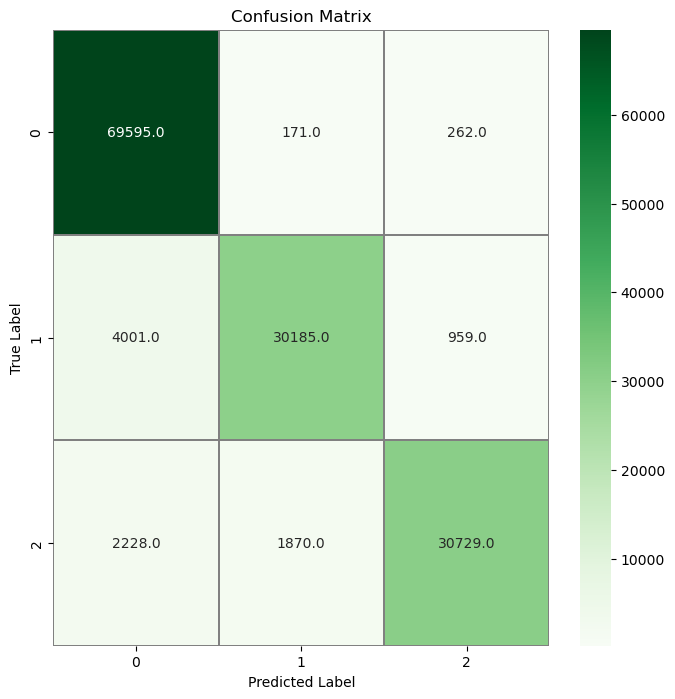

In [43]:
confusion_mtx = confusion_matrix(y_test, y_pred_test) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [44]:
print(classification_report(y_test,y_pred_test))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     70028
           1       0.94      0.86      0.90     35145
           2       0.96      0.88      0.92     34827

    accuracy                           0.93    140000
   macro avg       0.94      0.91      0.92    140000
weighted avg       0.93      0.93      0.93    140000

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    279972
           1       0.94      0.86      0.90    139855
           2       0.96      0.88      0.92    140173

    accuracy                           0.93    560000
   macro avg       0.94      0.91      0.92    560000
weighted avg       0.93      0.93      0.93    560000

